# TEI Tools

> Tools for working with TEI/XML

In [ ]:
#| default_exp api

In [ ]:
#| hide
from nbdev.showdoc import *
from bs4 import BeautifulSoup
from pprint import pprint
import glob
# %matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
#| export
class TeiTools:
    def __init__(self):
        '''
        This is the main class for the tei-tools package.'''
        pass

    @staticmethod
    def hello_world(title):
        '''
        This is a static method that prints "Hello World"
        
        Parameters:  
        * title: str  -  The title of the book
        '''
        
        print("Hello World")

    @staticmethod
    def analyze(path, freq={}):
        '''
        指定したファイルに含まれる要素および属性を抽出する
        
        Parameters:  
        * path: str  -  Path to the TEI/XML file  
        * freq: dict  -  A dictionary to store the results
        '''

        soup = BeautifulSoup(open(path,'r'), "xml")
            
        children = soup.find("TEI").findChildren(recursive=False)

        # freq = {}

        for child in children:
            p = child.name

            if p not in freq:
                freq[p] = {}

            elements = child.findChildren(recursive=True)
            # print(len(elements))

            m = freq[p]

            for element in elements:
                name = element.name
                if name not in m:
                    m[name] = {}

                attrs = element.attrs
                if len(attrs) == 0:
                    field = "none"
                    if field not in m[name]:
                        m[name][field] = 0
                    m[name][field] += 1
                for attr in attrs:
                    field = attr
                    if field not in m[name]:
                        m[name][field] = 0
                    m[name][field] += 1
        
        return freq

    @staticmethod
    def visualize(data):
        '''
        指定したデータを可視化する
        
        Parameters:  
        * data: dict  -  Data to visualize
        '''

        # a = range(0, 7)
        # b = [55,21,61,98,85,52,99]

        freq = {}
        for group in data:
            # count = 0
            # pprint(data[key])
            for element in data[group]:
                for attr in data[group][element]:
                    if element not in freq:
                        freq[element] = 0
                    freq[element] += data[group][element][attr]

        # 値の多い順にソート
        freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1])}

        a = []
        b = []
        for key in freq:
            a.append(key)
            b.append(freq[key])
        plt.barh(a, b)
        plt.show()

    @staticmethod
    def analyzeDir(path):
        '''
        指定したパスに含まれるXMLファイルに含まれる要素および属性を抽出する
        
        Parameters:  
        * path: str  -  Path to the TEI/XML file e.g. "data/*.xml"
        '''

        freq = {}

        files = glob.glob(path, recursive=True)

        for file in files:
            freq = TeiTools.analyze(file, freq=freq)

        return freq

## 準備

サンプルデータとして、校異源氏物語のTEI/XMLをダウンロード

In [ ]:
# !git clone https://github.com/kouigenjimonogatari/kouigenjimonogatari.github.io example

fatal: destination path 'example' already exists and is not an empty directory.


In [ ]:
!wget https://www.hi.u-tokyo.ac.jp/collection/degitalgallary/wakozukan/tei/data/main.xml -O example/main.xml 

--2022-09-22 09:11:15--  https://www.hi.u-tokyo.ac.jp/collection/degitalgallary/wakozukan/tei/data/main.xml
www.hi.u-tokyo.ac.jp (www.hi.u-tokyo.ac.jp) をDNSに問いあわせています... 52.192.145.245, 52.197.208.150
www.hi.u-tokyo.ac.jp (www.hi.u-tokyo.ac.jp)|52.192.145.245|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 24518 (24K) [text/xml]
`example/main.xml' に保存中

example/main.xml    100%[===================>]  23.94K  --.-KB/s 時間 0.01s      

2022-09-22 09:11:15 (1.89 MB/s) - `example/main.xml' へ保存完了 [24518/24518]



## 要素の分析

TEI/XMLに含まれる要素および属性を一覧します。

In [ ]:
show_doc(TeiTools.analyze)

---

### TeiTools.analyze

>      TeiTools.analyze (path, freq={})

指定したファイルに含まれる要素および属性を抽出する

Parameters:  
* path: str  -  Path to the TEI/XML file  
* freq: dict  -  A dictionary to store the results

In [ ]:
input_path = "example/main.xml"
results = TeiTools.analyze(input_path)
results

{'teiHeader': {'fileDesc': {'none': 1},
  'titleStmt': {'none': 1},
  'title': {'none': 1},
  'publicationStmt': {'none': 1},
  'publisher': {'none': 1},
  'sourceDesc': {'none': 1},
  'listPerson': {'none': 1},
  'person': {'xml:id': 9},
  'persName': {'none': 9},
  'note': {'type': 27, 'subtype': 1, 'source': 1},
  'listPlace': {'none': 1},
  'place': {'xml:id': 5},
  'placeName': {'none': 5}},
 'text': {'body': {'none': 1},
  'div': {'type': 3, 'none': 2},
  'ab': {'style': 14, 'type': 15, 'xml:id': 15, 'none': 2},
  'lb': {'style': 14, 'none': 6},
  'seg': {'type': 23, 'xml:id': 23},
  'add': {'xml:id': 10},
  'note': {'target': 4, 'type': 4},
  'p': {'none': 6},
  'persName': {'corresp': 9},
  'name': {'type': 3, 'xml:id': 3},
  'placeName': {'corresp': 5}},
 'facsimile': {'surface': {'source': 1},
  'zone': {'xml:id': 14, 'ulx': 14, 'uly': 14, 'lrx': 14, 'lry': 14}}}

In [ ]:
show_doc(TeiTools.visualize)

---

### TeiTools.visualize

>      TeiTools.visualize (data)

指定したデータを可視化する

Parameters:  
* data: dict  -  Data to visualize

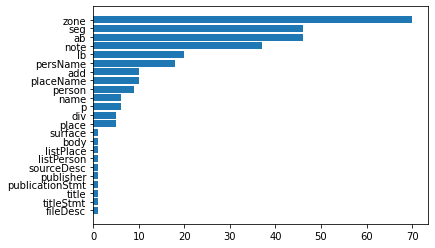

In [ ]:
TeiTools.visualize(results)

In [ ]:
show_doc(TeiTools.analyzeDir)

---

### TeiTools.analyzeDir

>      TeiTools.analyzeDir (path)

指定したパスに含まれるXMLファイルに含まれる要素および属性を抽出する

Parameters:  
* path: str  -  Path to the TEI/XML file e.g. "data/*.xml"

In [ ]:
input_path = "example/tei/*.xml"
results = TeiTools.analyzeDir(input_path)
results

{'teiHeader': {'fileDesc': {'none': 54},
  'titleStmt': {'none': 54},
  'title': {'none': 108},
  'author': {'none': 108},
  'respStmt': {'none': 270},
  'resp': {'when': 270},
  'name': {'none': 270},
  'publicationStmt': {'none': 54},
  'distributor': {'none': 54},
  'date': {'when': 54},
  'availability': {'none': 54},
  'p': {'none': 108},
  'ref': {'target': 108},
  'sourceDesc': {'none': 54},
  'bibl': {'none': 54},
  'publisher': {'none': 54},
  'encodingDesc': {'none': 54}},
 'facsimile': {'surfaceGrp': {'facs': 54},
  'surface': {'none': 949},
  'graphic': {'n': 949, 'url': 949},
  'zone': {'xml:id': 1812,
   'lrx': 1812,
   'lry': 1812,
   'ulx': 1812,
   'uly': 1812}},
 'text': {'body': {'none': 54},
  'p': {'none': 54},
  'lb': {'none': 26877},
  'pb': {'n': 1812, 'facs': 1812},
  'seg': {'corresp': 25065}}}

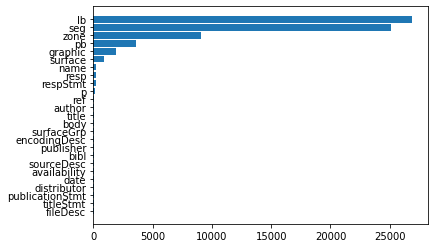

In [ ]:
TeiTools.visualize(results)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()